# CARIACO PROJECT '1' - Final Plotting
# Plot boxplot of functional types
- ordered according to biomass
- ordered according to size

In [444]:
#load required packages:
require(tidyverse, warn.conflicts = FALSE); # many useful data analysis tools
require(cowplot, warn.conflicts = FALSE); # for nicer plots, includes ggplot2
require(oce, warn.conflicts = FALSE); # includes the used "integrateTrapezoid" function
require(pracma)

Loading required package: pracma

Attaching package: ‘pracma’

The following objects are masked from ‘package:oce’:

    detrend, grad

The following object is masked from ‘package:purrr’:

    cross



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [125]:
# Function to read specific functional type data from dataset
## checks for number of NAs and removes them from resulting dataframe
extractfunctype <- function(FullFT_df, ft='Diatoms_Hapto1', reg=1){
    if(reg==1){
        date = 'Date'
        depth = 'depth'
        ft = ft
    }else{
        date = 'X2Date'
        depth = 'X2depth'
        ft = paste('X2',ft, sep="")
    }
        
    FT_df_x <- data.frame("date" = FullFT_df[,date], "depth" = FullFT_df[,depth], "value" = FullFT_df[,ft])
    
    # print(head(FT_df_x))
    # print( length(is.na(FT_df_x$date)) )
    
    FT_df <- FT_df_x[complete.cases(FT_df_x),]
    
    return(FT_df)
}

In [40]:
# debugging:
# head(extractfunctype(FuncTypeChlA, ft="Diatoms_Hapto1", reg=1))

In [309]:
extractnintegrate <- function(data = FullFT_df, functype='Diatoms_Hapto1', regime=1){
    #calling extraction function
    DF <- extractfunctype(data, ft = functype, reg = regime)
    
    DF_1 <- DF %>%
        group_by(date, depth) %>%
        # averaging multiple measurements at same depth here
        # also converting ng/l to mg/m^-3 
        summarise(value = mean(value)/1000) %>%
        ungroup()
    
    # print(head(DF,n=10))
    # print(sum(is.na(DF$value)))
    # print(head(DF_1,n=10))
    
    # print(nrow(DF))
    # print(nrow(DF_1))
    
    DFtest <- DF_1 %>%
        group_by(date) %>%
        filter(sum(!is.na(value))>2) %>%
        do(data.frame(middepth = as.numeric(stats::filter(.$depth, c(0.5,0.5))), midval = as.numeric(stats::filter(.$value, c(0.5,0.5))))) %>%
        ungroup()

    DFtest <- na.omit(DFtest)

    DF_int <- DFtest %>%
        group_by(date) %>%
        do(data.frame("value_int" = with(.,integrateTrapezoid(x=middepth, y=midval)), "reg" = regime , "spec" = functype)) %>%
        ungroup()
}

In [310]:
# debugging:
# D1_int <- extractnintegrate(data=FuncTypeChlA, functype="Diatoms_Hapto1", regime=1)

## read data from csv.
data courtesy of JP & CBN

In [311]:
FuncTypeChlA <- read.csv("CARIACO Data for Algal Group Plots.csv")
FuncTypeChlA$Date <- as.Date(as.character(FuncTypeChlA$Date), format="%m/%d/%y")
FuncTypeChlA$X2Date <- as.Date(as.character(FuncTypeChlA$X2Date), format="%m/%d/%y")

In [312]:
cat(colnames(FuncTypeChlA), sep='  -  ')

Date  -  depth  -  Prasinophytes  -  Dinoflagellates  -  Cryptophytes  -  Haptophytes2  -  Chlorophytes  -  Cyanobacteria  -  Diatoms_Hapto1  -  Hapto3_Hapto4  -  X2Date  -  X2depth  -  X2Prasinophytes  -  X2Dinoflagellates  -  X2Cryptophytes  -  X2Haptophytes2  -  X2Chlorophytes  -  X2Cyanobacteria  -  X2Diatoms_Hapto1  -  X2Hapto3_Hapto4

## interpolate all individual functional types

In [313]:
Di1_int <- extractnintegrate(data=FuncTypeChlA, functype="Diatoms_Hapto1", regime=1)
Di2_int <- extractnintegrate(data=FuncTypeChlA, functype="Diatoms_Hapto1", regime=2)

Co1_int <- extractnintegrate(data=FuncTypeChlA, functype="Hapto3_Hapto4", regime=1)
Co2_int <- extractnintegrate(data=FuncTypeChlA, functype="Hapto3_Hapto4", regime=2)

Cy1_int <- extractnintegrate(data=FuncTypeChlA, functype="Cyanobacteria", regime=1)
Cy2_int <- extractnintegrate(data=FuncTypeChlA, functype="Cyanobacteria", regime=2)

Chl1_int <- extractnintegrate(data=FuncTypeChlA, functype="Chlorophytes", regime=1)
Chl2_int <- extractnintegrate(data=FuncTypeChlA, functype="Chlorophytes", regime=2)

H21_int <- extractnintegrate(data=FuncTypeChlA, functype="Haptophytes2", regime=1)
H22_int <- extractnintegrate(data=FuncTypeChlA, functype="Haptophytes2", regime=2)

Cry1_int <- extractnintegrate(data=FuncTypeChlA, functype="Cryptophytes", regime=1)
Cry2_int <- extractnintegrate(data=FuncTypeChlA, functype="Cryptophytes", regime=2)

Dino1_int <- extractnintegrate(data=FuncTypeChlA, functype="Dinoflagellates", regime=1)
Dino2_int <- extractnintegrate(data=FuncTypeChlA, functype="Dinoflagellates", regime=2)

Pr1_int <- extractnintegrate(data=FuncTypeChlA, functype="Prasinophytes", regime=1)
Pr2_int <- extractnintegrate(data=FuncTypeChlA, functype="Prasinophytes", regime=2)

In [314]:
tail(Di1_int)

date,value_int,reg,spec
2000-05-11,16.359053,1,Diatoms_Hapto1
2000-06-06,4.135761,1,Diatoms_Hapto1
2000-07-07,2.208820,1,Diatoms_Hapto1
2000-08-09,3.861629,1,Diatoms_Hapto1
2000-09-12,13.712870,1,Diatoms_Hapto1
2000-10-10,3.032038,1,Diatoms_Hapto1


## combine into large dataframe

In [315]:
FT_ALL <- rbind(Di1_int,Di2_int, Co1_int,Co2_int, Cy1_int,Cy2_int, Chl1_int,Chl2_int, H21_int,H22_int, Cry1_int,Cry2_int, Dino1_int,Dino2_int, Pr1_int,Pr2_int)

In [316]:
FT_ALL$reg <- as.factor(FT_ALL$reg)
head(FT_ALL)

date,value_int,reg,spec
1995-12-14,5.68066,1,Diatoms_Hapto1
1996-01-13,28.02887,1,Diatoms_Hapto1
1996-02-14,20.03807,1,Diatoms_Hapto1
1996-03-13,11.07531,1,Diatoms_Hapto1
1996-04-17,97.29252,1,Diatoms_Hapto1
1996-05-10,26.69573,1,Diatoms_Hapto1


In [317]:
FT_ALL$spec <- factor(FT_ALL$spec, levels = c("Prasinophytes","Dinoflagellates","Cryptophytes","Hapto3_Hapto4", "Chlorophytes","Cyanobacteria","Haptophytes2","Diatoms_Hapto1"),ordered = TRUE)

In [318]:
FT_means <- aggregate(value_int ~  reg + spec, FT_ALL, mean)
FT_means$depint_mean <- FT_means$value_int
FT_means$depint_mean_rounded <- round(FT_means$depint_mean, digits = 2)

FT_medians <- aggregate(value_int ~  reg + spec, FT_ALL, median)

FT_means$depint_median <- FT_medians$value_int
FT_means$depint_median_rounded <- round(FT_means$depint_median, digits = 2)

tail(FT_means)

,reg,spec,value_int,depint_mean,depint_mean_rounded,depint_median,depint_median_rounded
11,1,Cyanobacteria,1.323879,1.323879,1.32,1.170824,1.17
12,2,Cyanobacteria,2.549244,2.549244,2.55,2.371888,2.37
13,1,Haptophytes2,1.669467,1.669467,1.67,0.564295,0.56
14,2,Haptophytes2,2.839736,2.839736,2.84,2.043195,2.04
15,1,Diatoms_Hapto1,15.471982,15.471982,15.47,11.200146,11.20
16,2,Diatoms_Hapto1,11.689144,11.689144,11.69,7.800610,7.80


In [483]:
# now check for biomass ranking of all types:
FT_means[order(FT_means$depint_mean, decreasing = T),]

FT_means_sum <- FT_means %>%
    group_by(spec) %>%
    summarise(meansum = sum(depint_mean)) %>%
    arrange(desc(meansum))

,reg,spec,value_int,depint_mean,depint_mean_rounded,depint_median,depint_median_rounded
15,1,Diatoms_Hapto1,15.4719820,15.4719820,15.47,11.20014562,11.20
16,2,Diatoms_Hapto1,11.6891443,11.6891443,11.69,7.80061000,7.80
8,2,Hapto3_Hapto4,6.8439483,6.8439483,6.84,5.86699250,5.87
7,1,Hapto3_Hapto4,5.7546287,5.7546287,5.75,3.90048313,3.90
14,2,Haptophytes2,2.8397363,2.8397363,2.84,2.04319500,2.04
12,2,Cyanobacteria,2.5492440,2.5492440,2.55,2.37188750,2.37
6,2,Cryptophytes,2.4988418,2.4988418,2.50,2.00333250,2.00
2,2,Prasinophytes,2.3804575,2.3804575,2.38,2.29363125,2.29
1,1,Prasinophytes,1.9046642,1.9046642,1.90,1.52046750,1.52
13,1,Haptophytes2,1.6694673,1.6694673,1.67,0.56429500,0.56


# create PLOT ordered by BIOMASS

In [484]:
FT_ALL$spec <- factor(FT_ALL$spec, levels = FT_means_sum$spec ,ordered = TRUE)

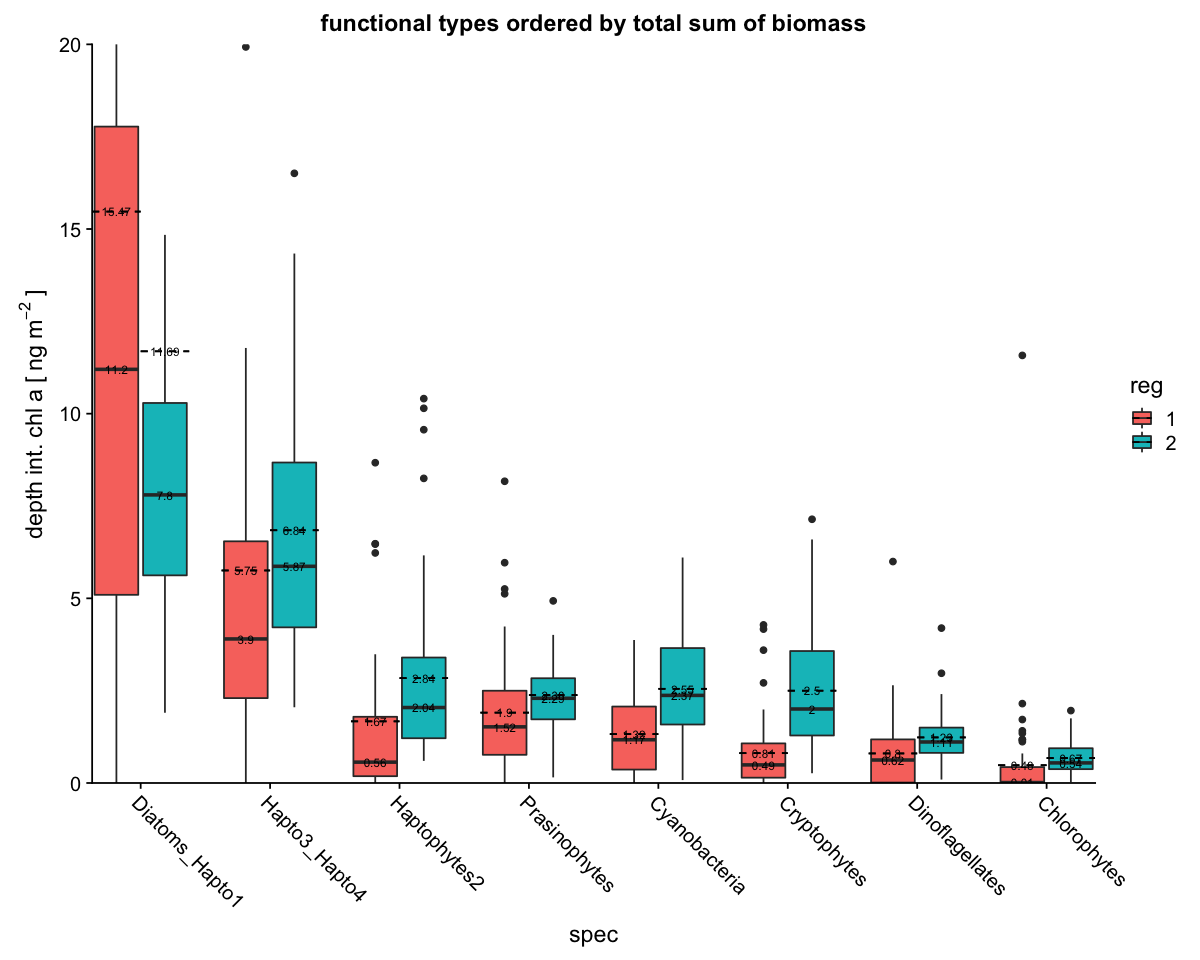

In [492]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data = FT_ALL, aes(y = value_int, x = spec, fill = reg)) + 
geom_boxplot() + ylab(expression(depth~int.~chl~a~'['~ng~m^{-2}~']')) + coord_cartesian(ylim=c(0,20), expand=F)+

stat_summary(fun.y = mean, geom = "errorbar", 
               aes(ymax = ..y.., ymin = ..y.., group = reg),
               width = 0.75, linetype = "dashed", position = position_dodge(), show.legend=T)+
               
#stat_summary(fun.y=mean, colour='red', geom="point", shape=18, size=3,show_guide = FALSE)

#geom_point(data = FT_means, aes(y=depint_mean, shape='d', col = 'black', group=col), show.legend = T) #+ 
geom_text(data = FT_means, aes(label = depint_mean_rounded, y = depint_mean, group = reg, x=spec),  show.legend = F, size=2.5, position = position_dodge(width = .75)) + #nudge_x = -0.3,
geom_text(data = FT_means, aes(label = depint_median_rounded, y = depint_median, group = reg, x=spec), show.legend = F, size=2.5, position = position_dodge(width = .75))+ #, nudge_x = 0.3
theme(axis.text.x=element_text(angle=-45, hjust=0)) + ggtitle('functional types ordered by total sum of biomass')

# new plot ordered by CELL SIZE

## first need to find out rough cell sizes for these functional groups present @cariaco

Diatoms:  
Reg1 & Reg2:  
pseudonitzschia delicatissima 19-76 µm * 1.5-2 µm  tapered towards end, in mexico 34 x 1.8 in size 
>(https://www.researchgate.net/profile/Nina_Lundholm/publication/222717248_Morphology_physiology_molecular_phylogeny_and_sexual_compatibility_of_the_cryptic_Pseudo-nitzschia_delicatissima_complex_Bacillariophyta_including_the_description_of_P_arenysensis_sp_nov/links/577a1b4d08aeb9427e2cabb2/Morphology-physiology-molecular-phylogeny-and-sexual-compatibility-of-the-cryptic-Pseudo-nitzschia-delicatissima-complex-Bacillariophyta-including-the-description-of-P-arenysensis-sp-nov.pdf)

Reg1 only:


Reg 2 only:
thalassiosira subtilis 17-34 µm diatmeter centric 
>(https://sci-hub.tw/10.1515/bot.1999.056, Aké-Castillo, J. A., Hernández-Becerril, D. U., & Meave del Castillo, M. E. (1999). Species of the Genus Thalassiosira (Bacillariophyceae) from the Gulf of Tehuantepec, Mexico. Botanica Marina, 42(6). doi:10.1515/bot.1999.056 )

leptocylindrus minimus Diámetro: 2-5.2 µm; eje pervalvar: 22-48 µm. 
>(https://scielo.conicyt.cl/scielo.php?pid=S0717-66432002000100002&script=sci_arttext)

chaetocerus compressus apical axis, 8.5-24 µm
>(https://www.redalyc.org/pdf/479/47943208.pdf)



COCCOS:
Emiliania huxleyi Diameter c. 5-10 µm
>Google

Haptophytes2



In [353]:
ggsave("functypecomp.pdf", width = 10, height = 5)

Warning message:
“Length of logical index must be 1 or 856, not 1712”Warning message:
“Length of logical index must be 1 or 856, not 1712”

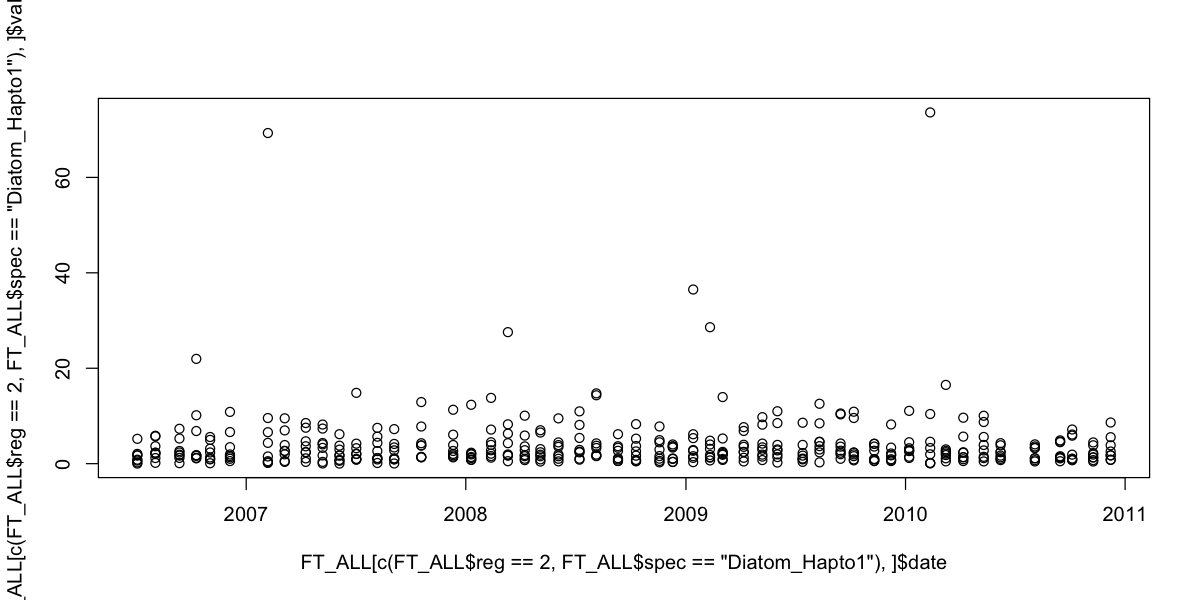

In [323]:
options(repr.plot.width=10, repr.plot.height=5)
#ggplot(data = FT_ALL, aes(y = value_int, x = spec, fill = reg)) + 
#geom_boxplot() + ylab(expression(depth~int.~chl~a~'['~ng~m^{-2}~']')) + coord_cartesian(ylim=c(0,20), expand=F)

plot(x = FT_ALL[c(FT_ALL$reg==2, FT_ALL$spec=="Diatom_Hapto1"), ]$date, y = FT_ALL[c(FT_ALL$reg==2, FT_ALL$spec=="Diatom_Hapto1"), ]$value_int)

[1] 11.68914

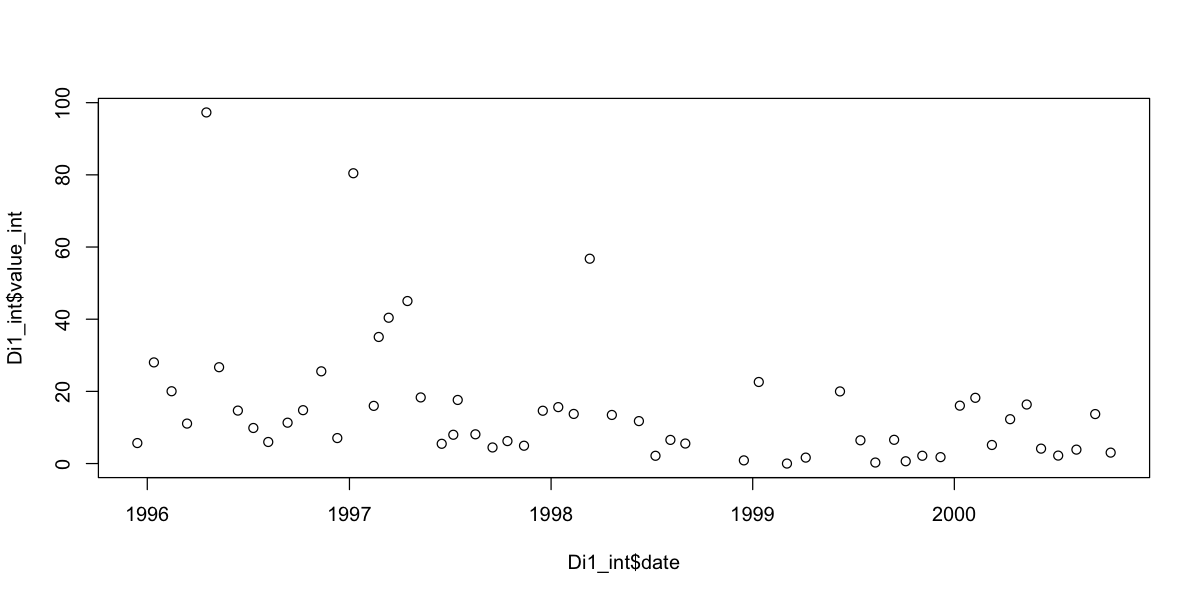

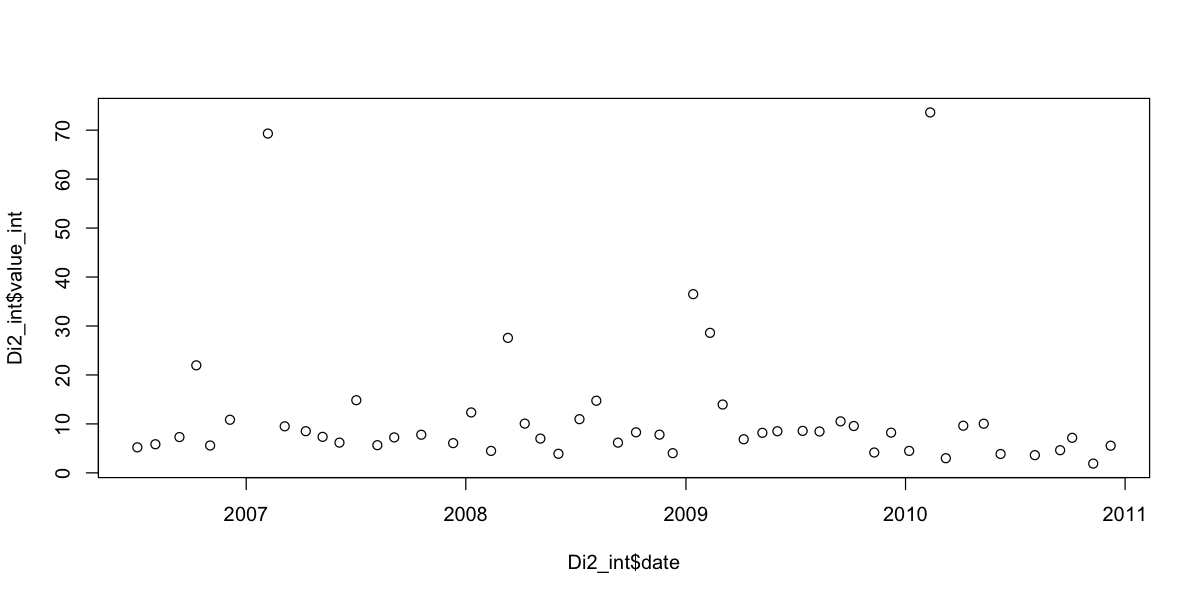

In [308]:
mean(Di2_int$value_int)
plot(Di1_int$date,Di1_int$value_int)
plot(Di2_int$date,Di2_int$value_int)

# now to finally settle this dispute:
## plot one vertical profile of the two >60 above
## then check different integrations graphically and compare results!
### on single profile..


In [541]:
dia1test <- extractfunctype(FuncTypeChlA, ft="Diatoms_Hapto1", reg=1)
dia2test <- extractfunctype(FuncTypeChlA, ft="Diatoms_Hapto1", reg=2)

date,depth,value
1997-06-17,1,0.10448
1997-06-17,7,0.10448
1997-06-17,15,0.11318
1997-06-17,25,0.03262
1997-06-17,35,0.16125
1997-06-17,55,0.04512
1997-06-17,75,0.00534
1997-06-17,100,0.00255
1997-07-08,1,0.21219
1997-07-08,7,0.26412


[1] "hello"
[1] "hello"


[1] 16.88257

[1] 15.63803

[1] 17.31252

[1] 15.63803

[1] 17.36151

[1] 12.83354

[1] 11.75899

[1] 13.08134

[1] 11.75899

[1] 13.08364

date,value_int,reg,spec
1995-12-14,5.866175,1,functype
1996-01-13,29.020890,1,functype
1996-02-14,20.237395,1,functype
1996-03-13,14.925140,1,functype
1996-04-17,101.297110,1,functype
1996-05-10,31.409455,1,functype
1996-06-13,15.995075,1,functype
1996-07-11,11.019770,1,functype
1996-08-07,8.370465,1,functype
1996-09-11,13.056410,1,functype


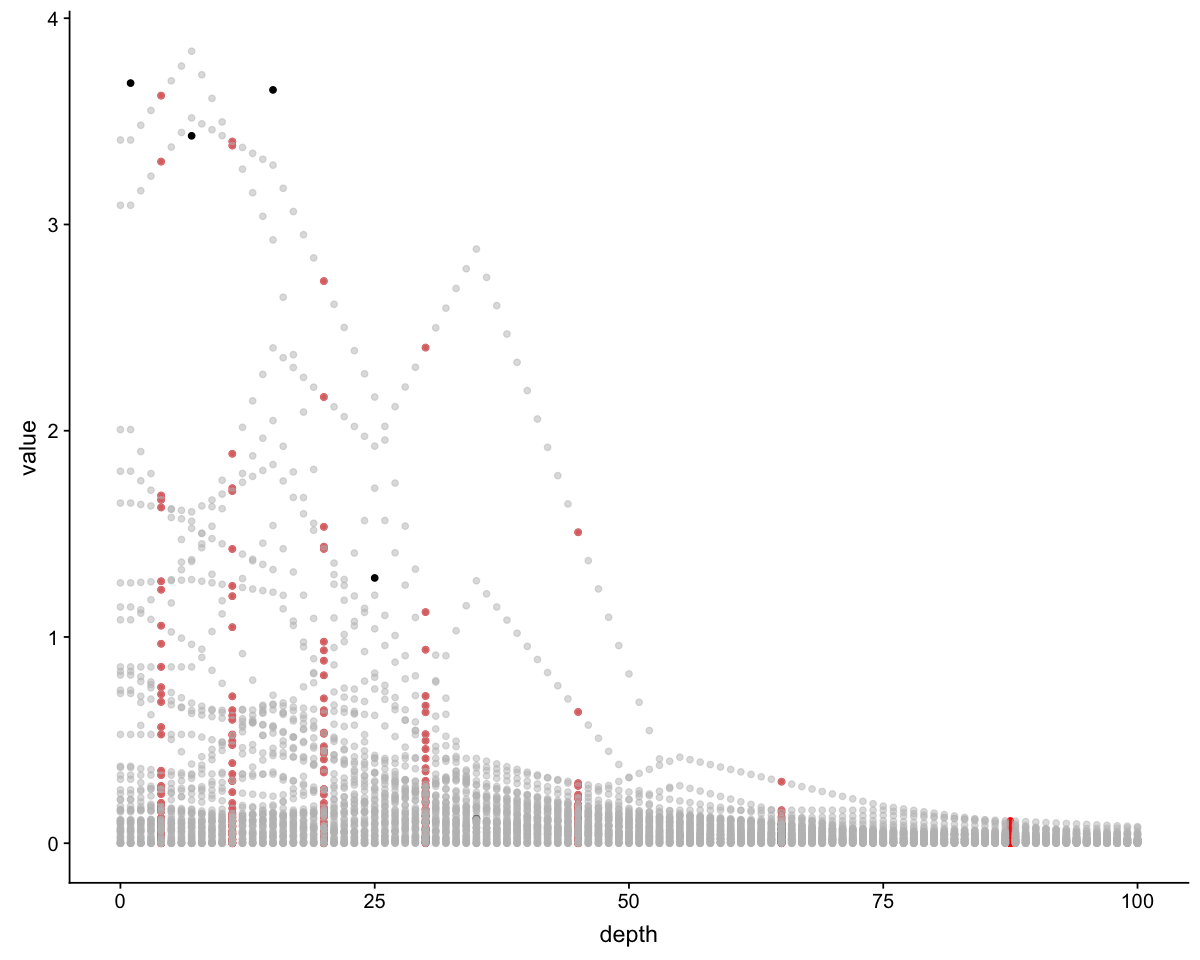

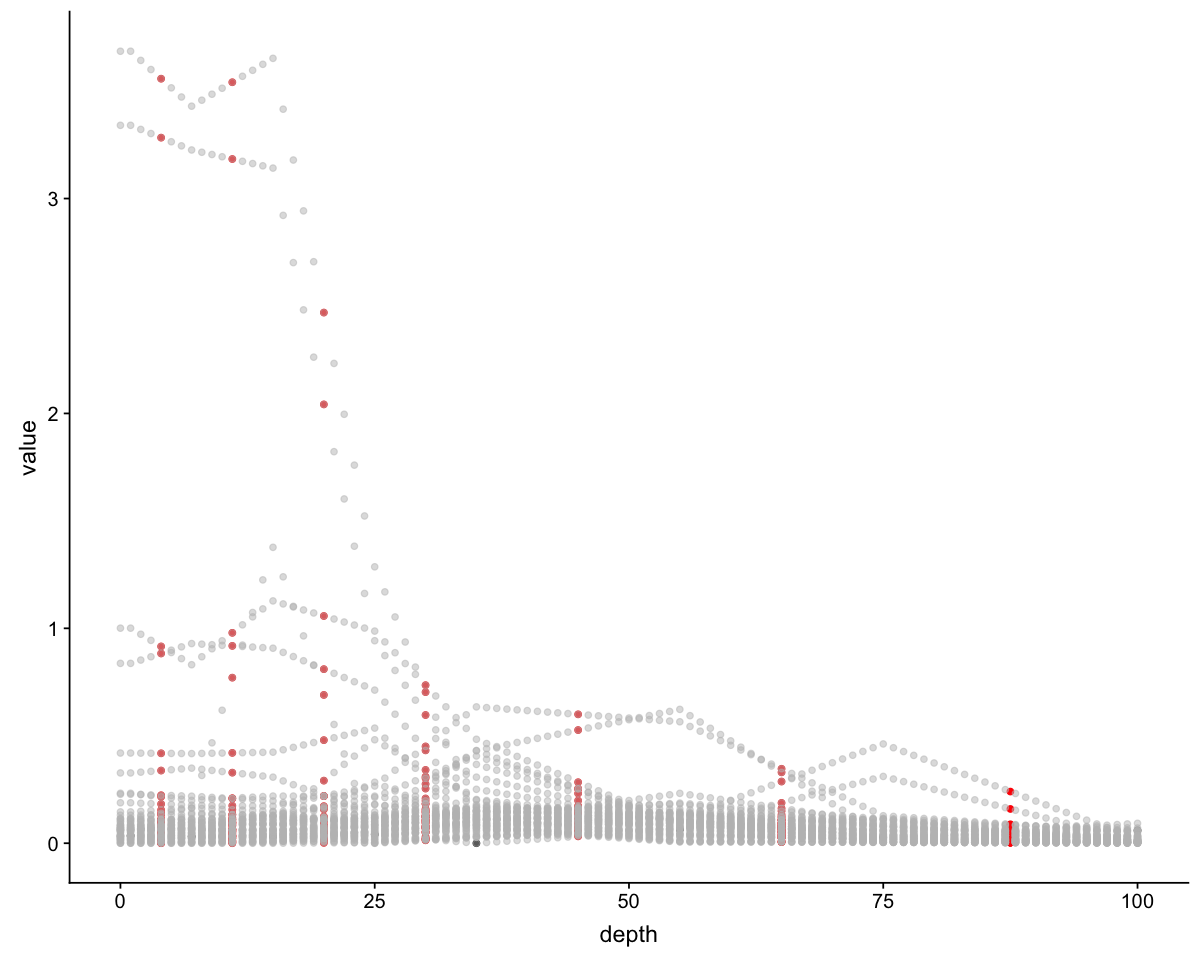

In [564]:
dia2max1 <- dia1test#[360:366,]
dia2max2 <- dia2test#[367:375,]

head(depthmean(dia2max1[150:1000,]), n=30)

d21_1 <- depthmean(dia2max1)
d22_1 <- depthmean(dia2max2)

depth_all <- c(1,7,15,25,35,55,75,100)

dJ_1 <- intrpltJAY(d21_1)

dJ_2 <- intrpltJAY(d22_1)

d21_linint <- linearInter(d21_1)
d22_linint <- linearInter(d22_1)

d21_2 <- midpointz(d21_1)
d22_2 <- midpointz(d22_1)

#a <- data.frame('date' = d21_2$date[1], 'middepth' = 0, 'midval' = 0 )
#b <- data.frame('date' = d21_2$date[1], 'middepth' = 100, 'midval' = 0 )
#d21_2 <- rbind(a,d21_2,b)

#c <- data.frame('date' = d22_2$date[1], 'middepth' = 0, 'midval' = 0 )
#d <- data.frame('date' = d22_2$date[1], 'middepth' = 100, 'midval' = 0 )
#d21_2 <- rbind(a,d21_2,b)
#d22_2 <- rbind(c,d22_2,d)

#d21_2

d21_mid_int <- intTrap(d21_2)
d21_lin_int <- intTrap(d21_linint)
d21_trap_int <- Trapz(d21_2)
d22_mid_int <- intTrap(d22_2)
d22_lin_int <- intTrap(d22_linint)
d22_trap_int <- Trapz(d22_2)

mean(dJ_1$value_int, na.rm=T)
mean(d21_mid_int$value_int, na.rm=T)
mean(d21_lin_int$value_int, na.rm=T)
mean(d21_trap_int$value_int, na.rm=T)
mean(d21_linint$midval, na.rm=T)*100
mean(dJ_2$value_int, na.rm=T)
mean(d22_mid_int$value_int, na.rm=T)
mean(d22_lin_int$value_int, na.rm=T)
mean(d22_trap_int$value_int, na.rm=T)
mean(d22_linint$midval, na.rm=T)*100

dJ_1

ggplot(d21,aes(x=depth,y=value))+geom_point() + geom_point(data=d21_2, aes(x=middepth, y=midval), col='red') +
    geom_point(data=d21_linint, aes(x=middepth, y=midval), col='grey', alpha=0.5) + xlim(0,100)
ggplot(d22,aes(x=depth,y=value))+geom_point() + geom_point(data=d22_2, aes(x=middepth, y=midval), col='red') + 
    geom_point(data=d22_linint, aes(x=middepth, y=midval), col='grey', alpha=0.5) + xlim(0,100)

In [441]:
ggsave("testinterpolation2.pdf",width=10,height=8)

In [539]:
# adapt interpolation function from PINCKNEY
ntpltJAYfunc <- function(x, y){
    N1 = length(y)
    area = 0
    for(j in 2:N1){
        area = area + (x[j] - x[j-1]) * (y[j] + y[j-1]) / 2
    }
    return(area)
}

intrpltJAY <- function(DFtest){

    DF_int <- DFtest %>%
        group_by(date) %>%
        do(data.frame("value_int" = with(.,ntpltJAYfunc(x=depth, y=value)), "reg" = 1 , "spec" = "functype")) %>%
        ungroup()
        
    return(DF_int)
}

In [540]:
depth_all <- c(1,7,15,25,35,55,75,100)

tex <- depthmean(dia2max1)
head(tex)
intrpltJAY(tex)

#linint <- linearInter(dia2max1)

#midp <- midpointz(dia2max1)

#intTrap(linint)
#Trapz(midp)

date,depth,value
2006-07-04,1,0.14582
2006-07-04,7,0.16357
2006-07-04,15,0.14873
2006-07-04,25,0.06708
2006-07-04,35,0.07160
2006-07-04,55,0.02659


date,value_int,reg,spec
2006-07-04,5.768770,1,functype
2006-08-03,6.206105,1,functype
2006-09-12,8.275705,1,functype
2006-10-10,22.785135,1,functype
2006-11-02,6.168005,1,functype
2006-12-05,11.438320,1,functype
2007-02-06,78.083295,1,functype
2007-03-06,10.451145,1,functype
2007-04-10,8.898745,1,functype
2007-05-08,7.852290,1,functype


In [529]:
depthmean <-function(DF){
    DF_1 <- DF %>%
        group_by(date, depth) %>%
        # averaging multiple measurements at same depth here
        # also converting ng/l to mg/m^-3 
        summarise(value = mean(value)/1000) %>%
        ungroup()
    
    depth_all <- c(1,7,15,25,35,55,75,100)
    
    DF_2 <- DF_1 %>%
        group_by(date) %>%
        complete(date, depth=depth_all) %>%
        fill(value) %>% #default direction down
        fill(value, .direction = "up")
    
    return(DF_2)
}
zz <- seq(0, 100, 1)
linearInter <- function(DF){
    DF_int <- DF %>%
        group_by(date) %>%
        filter(sum(!is.na(value))>2) %>%
        filter(!is.na(depth)) %>%
        do(data.frame(value_int = with(.,approx(depth, value, zz, "linear", rule=2)), depth = zz))
        
    print('hello')
    names(DF_int)[names(DF_int) == 'value_int.y'] <- 'midval'
    names(DF_int)[names(DF_int) == 'depth'] <- 'middepth'
        
    return(DF_int)
}

midpointz <- function(DF_1){
    DFtest <- DF_1 %>%
        group_by(date) %>%
        filter(sum(!is.na(value))>2) %>%
        do(data.frame(middepth = as.numeric(stats::filter(.$depth, c(0.5,0.5))), midval = as.numeric(stats::filter(.$value, c(0.5,0.5))))) %>%
        ungroup()

    DFtest <- na.omit(DFtest)
    return(DFtest)
}

intTrap <- function(DFtest){
    DF_int <- DFtest %>%
        group_by(date) %>%
        do(data.frame("value_int" = with(.,integrateTrapezoid(x=middepth, y=midval), xmin=0,xmax=100), "reg" = 1 , "spec" = "functype")) %>%
        ungroup()
        
    return(DF_int)
}

Trapz <- function(DFtest){
    DF_int <- DFtest %>%
        group_by(date) %>%
        do(data.frame("value_int" = with(.,trapz(x=middepth, y=midval)), "reg" = 1 , "spec" = "functype")) %>% # , a=0, b=100
        ungroup()
        
    return(DF_int)
}

In [384]:
DF_int2

date,value_int,reg,spec
2010-03-09,2.994641,1,functype


In [365]:
which(max(dia1test$value) == dia1test$value)
dia1test[230:237,]
which(max(dia2test$value) == dia2test$value)
dia2test[357:379,]

[1] 230

,date,depth,value
230,1998-03-12,7,3840.02
231,1998-03-12,15,2925.40
232,1998-03-12,25,142.66
233,1998-03-12,35,53.46
234,1998-03-12,55,22.41
235,1998-03-12,75,13.40
236,1998-03-12,100,17.01
237,1998-04-21,1,157.70


[1] 361

,date,depth,value
357,2010-01-07,55,10.16
358,2010-01-07,75,3.84
359,2010-01-07,100,1.28
360,2010-02-11,1,3617.51
361,2010-02-11,1,3753.49
362,2010-02-11,7,3429.83
363,2010-02-11,15,3652.45
364,2010-02-11,25,1286.25
365,2010-02-11,35,119.91
366,2010-02-11,55,36.52
